# Analisis Exploratorio de todos los Datos de BBVA

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras as kt
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from bioinfokit.visuz import cluster
from datetime import date 
from sklearn import linear_model
from scipy.stats import skew
import statsmodels.api as sm
import requests
from plotnine import ggplot, aes, geom_point
from forex_python.converter import CurrencyRates
from bs4 import BeautifulSoup
import datetime

In [9]:
dataset = pd.read_excel("Datasets/dataset_tasacion_train.xlsx", header=[0], index_col=None)
#Pequeño truquito para tratar los datos NA como ceros

dataset[:33]

#dataset['Moneda principal para cálculos'].isna().sum()

#Son 39,619 datos
#print(len(dataset))

,Fecha entrega del Informe,Calle,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Moneda principal para cálculos,Área Terreno,Área Construcción,Valor comercial
0,2016-09-01 19:00:00,REBECA OQUENDO,NaN,Lima,Lima,Breña,1.0,0.0,-12.059545,-77.046595,...,NaN,NaN,4.0,NaN,NaN,Comparación de mercado (directo),NaN,15.91,65.30,83754
1,2021-03-11 19:00:00,CONDOMINIO DOSS,NaN,Lima,Lima,Comas,0.0,0.0,-11.937662,-77.066525,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),NaN,8.12,91.78,85355
2,2019-03-18 19:00:00,MANZANA 14 LT 10 LOS JARDINES DEL GOLF,NaN,La Libertad,Trujillo,Victor Larco Herrera,0.0,0.0,-8.135306,-79.035518,...,NaN,NaN,12.0,NaN,Regular,Comparación de mercado (directo),NaN,20.51,89.19,83838
3,2019-07-25 19:00:00,TRINIDAD MORAN,NaN,Lima,Lima,Lince,NaN,NaN,-12.089796,-77.039245,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),NaN,7.48,52.90,111619
4,2018-01-01 19:00:00,MZ 8 AC,NaN,Lima,Lima,Villa María del Triunfo,1.0,0.0,-12.181048,-76.927642,...,NaN,NaN,19.0,NaN,Bueno,Costos o reposición (directo),NaN,240.00,566.00,305191
5,2021-01-27 19:00:00,ABRAHAM VALDELOMAR,NaN,Lima,Lima,Pueblo Libre,0.0,0.0,-12.073305,-77.067643,...,NaN,NaN,1.0,NaN,Muy bueno,Comparación de mercado (directo),NaN,5.45,52.12,80264
6,2016-03-07 19:00:00,31,NaN,Lima,Lima,Lima,1.0,1.0,-12.107400,-77.014200,...,NaN,NaN,20.0,NaN,NaN,Comparación de mercado (directo),NaN,86.47,155.00,290088
7,2021-01-06 19:00:00,MANZANOS,NaN,Lima,Lima,San Juan de Lurigancho,0.0,0.0,-11.959087,-76.992018,...,NaN,NaN,23.0,NaN,Regular,Costos o reposición (directo),NaN,90.00,293.84,136930
8,2018-05-03 19:00:00,RIO,NaN,Lima,Lima,Pueblo Libre,1.0,0.0,-12.075226,-77.056260,...,NaN,NaN,2.0,NaN,Bueno,Comparación de mercado (directo),NaN,19.47,95.90,141126
9,2016-06-19 19:00:00,S/N,NaN,Lima,Lima,Comas,0.0,0.0,-11.931685,-77.059962,...,NaN,NaN,0.0,NaN,NaN,Comparación de mercado (directo),NaN,6.93,72.38,60405


### Consideramos los NAN values como dolares americanos según la normativa de tasación del banco

In [10]:
dataset['Moneda principal para cálculos'].fillna('USD', inplace=True)
dataset[: 33]


,Fecha entrega del Informe,Calle,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Moneda principal para cálculos,Área Terreno,Área Construcción,Valor comercial
0,2016-09-01 19:00:00,REBECA OQUENDO,NaN,Lima,Lima,Breña,1.0,0.0,-12.059545,-77.046595,...,NaN,NaN,4.0,NaN,NaN,Comparación de mercado (directo),USD,15.91,65.30,83754
1,2021-03-11 19:00:00,CONDOMINIO DOSS,NaN,Lima,Lima,Comas,0.0,0.0,-11.937662,-77.066525,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),USD,8.12,91.78,85355
2,2019-03-18 19:00:00,MANZANA 14 LT 10 LOS JARDINES DEL GOLF,NaN,La Libertad,Trujillo,Victor Larco Herrera,0.0,0.0,-8.135306,-79.035518,...,NaN,NaN,12.0,NaN,Regular,Comparación de mercado (directo),USD,20.51,89.19,83838
3,2019-07-25 19:00:00,TRINIDAD MORAN,NaN,Lima,Lima,Lince,NaN,NaN,-12.089796,-77.039245,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),USD,7.48,52.90,111619
4,2018-01-01 19:00:00,MZ 8 AC,NaN,Lima,Lima,Villa María del Triunfo,1.0,0.0,-12.181048,-76.927642,...,NaN,NaN,19.0,NaN,Bueno,Costos o reposición (directo),USD,240.00,566.00,305191
5,2021-01-27 19:00:00,ABRAHAM VALDELOMAR,NaN,Lima,Lima,Pueblo Libre,0.0,0.0,-12.073305,-77.067643,...,NaN,NaN,1.0,NaN,Muy bueno,Comparación de mercado (directo),USD,5.45,52.12,80264
6,2016-03-07 19:00:00,31,NaN,Lima,Lima,Lima,1.0,1.0,-12.107400,-77.014200,...,NaN,NaN,20.0,NaN,NaN,Comparación de mercado (directo),USD,86.47,155.00,290088
7,2021-01-06 19:00:00,MANZANOS,NaN,Lima,Lima,San Juan de Lurigancho,0.0,0.0,-11.959087,-76.992018,...,NaN,NaN,23.0,NaN,Regular,Costos o reposición (directo),USD,90.00,293.84,136930
8,2018-05-03 19:00:00,RIO,NaN,Lima,Lima,Pueblo Libre,1.0,0.0,-12.075226,-77.056260,...,NaN,NaN,2.0,NaN,Bueno,Comparación de mercado (directo),USD,19.47,95.90,141126
9,2016-06-19 19:00:00,S/N,NaN,Lima,Lima,Comas,0.0,0.0,-11.931685,-77.059962,...,NaN,NaN,0.0,NaN,NaN,Comparación de mercado (directo),USD,6.93,72.38,60405


# Ahora vamos a rascar los datos del banco de Perú para la conversión de moneda.

Se tiene el promedio de cambio desde Enero del 92 hasta Febrero del 2023

In [11]:
url = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01234PM/xls/1992-1/2023-2'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

table = soup.find('table')
rateexchangedata = pd.read_html(str(table))[0]
rateexchangedata.head(5)

,Unnamed: 0,Dólar Americano (US$)
0,Ene.1992,0.987955
1,Feb.1992,0.971500
2,Mar.1992,0.955000
3,Abr.1992,1.021500
4,May.1992,1.131000


In [12]:
rateexchangedata.rename(columns={'Unnamed: 0': 'Date'}, inplace= True)

month_dict = {
    'Ene': 1,
    'Feb': 2,
    'Mar': 3,
    'Abr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Ago': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dic': 12,
}

def convertir_fecha(fecha):
    mes, anio = fecha.split('.')
    mes_num = month_dict[mes]
    return f'{anio}-{mes}-01'

rateexchangedata['Date'] = rateexchangedata['Date'].map(convertir_fecha) 

In [13]:
rateexchangedata.head()

,Date,Dólar Americano (US$)
0,1992-Ene-01,0.987955
1,1992-Feb-01,0.971500
2,1992-Mar-01,0.955000
3,1992-Abr-01,1.021500
4,1992-May-01,1.131000


In [14]:
rateexchangedata.rename(columns={'Dólar Americano (US$)': 'PEN'}, inplace= True)

rateexchangedata.head()


,Date,PEN
0,1992-Ene-01,0.987955
1,1992-Feb-01,0.971500
2,1992-Mar-01,0.955000
3,1992-Abr-01,1.021500
4,1992-May-01,1.131000


## Ahora vamos a hacer la conversión entre los dos datasets.

### dataset es la del banco
### rateexchangedata es la base de datos de las tasas de cambio

In [15]:
def convertir_a_usd(row):
    if row['Moneda principal para cálculos'] != 'USD':
        fecha = row['Fecha entrega del Informe']
        moneda = row['Moneda principal para cálculos']
        year, month, _ = str(fecha).split('-')    # Convertir fecha a string antes de hacer split
        fecha_busqueda = f'{year}-{month}-01'     # Crear la fecha de búsqueda en el rateexchangedata
        #print(moneda)
        #print(moneda in rateexchangedata.columns.values)
        #print(fecha_busqueda)
        #print(fecha_busqueda in rateexchangedata['Date'].values)
        #print(rateexchangedata['Date'].values)
        if moneda in rateexchangedata.columns.values and fecha_busqueda in rateexchangedata['Date'].values:
            tipo_cambio = rateexchangedata[rateexchangedata['Date']==fecha_busqueda][moneda].values[0]
            return row['Valor comercial'] / tipo_cambio
    return row['Valor comercial']

dataset['Valor comercial'] = dataset.apply(convertir_a_usd,axis = 1)

In [16]:
dataset[:33]

,Fecha entrega del Informe,Calle,Piso,Departamento,Provincia,Distrito,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),...,Posición,Número de frentes,Edad,Elevador,Estado de conservación,Método Representado,Moneda principal para cálculos,Área Terreno,Área Construcción,Valor comercial
0,2016-09-01 19:00:00,REBECA OQUENDO,NaN,Lima,Lima,Breña,1.0,0.0,-12.059545,-77.046595,...,NaN,NaN,4.0,NaN,NaN,Comparación de mercado (directo),USD,15.91,65.30,83754
1,2021-03-11 19:00:00,CONDOMINIO DOSS,NaN,Lima,Lima,Comas,0.0,0.0,-11.937662,-77.066525,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),USD,8.12,91.78,85355
2,2019-03-18 19:00:00,MANZANA 14 LT 10 LOS JARDINES DEL GOLF,NaN,La Libertad,Trujillo,Victor Larco Herrera,0.0,0.0,-8.135306,-79.035518,...,NaN,NaN,12.0,NaN,Regular,Comparación de mercado (directo),USD,20.51,89.19,83838
3,2019-07-25 19:00:00,TRINIDAD MORAN,NaN,Lima,Lima,Lince,NaN,NaN,-12.089796,-77.039245,...,NaN,NaN,0.0,NaN,En proyecto,Comparación de mercado (directo),USD,7.48,52.90,111619
4,2018-01-01 19:00:00,MZ 8 AC,NaN,Lima,Lima,Villa María del Triunfo,1.0,0.0,-12.181048,-76.927642,...,NaN,NaN,19.0,NaN,Bueno,Costos o reposición (directo),USD,240.00,566.00,305191
5,2021-01-27 19:00:00,ABRAHAM VALDELOMAR,NaN,Lima,Lima,Pueblo Libre,0.0,0.0,-12.073305,-77.067643,...,NaN,NaN,1.0,NaN,Muy bueno,Comparación de mercado (directo),USD,5.45,52.12,80264
6,2016-03-07 19:00:00,31,NaN,Lima,Lima,Lima,1.0,1.0,-12.107400,-77.014200,...,NaN,NaN,20.0,NaN,NaN,Comparación de mercado (directo),USD,86.47,155.00,290088
7,2021-01-06 19:00:00,MANZANOS,NaN,Lima,Lima,San Juan de Lurigancho,0.0,0.0,-11.959087,-76.992018,...,NaN,NaN,23.0,NaN,Regular,Costos o reposición (directo),USD,90.00,293.84,136930
8,2018-05-03 19:00:00,RIO,NaN,Lima,Lima,Pueblo Libre,1.0,0.0,-12.075226,-77.056260,...,NaN,NaN,2.0,NaN,Bueno,Comparación de mercado (directo),USD,19.47,95.90,141126
9,2016-06-19 19:00:00,S/N,NaN,Lima,Lima,Comas,0.0,0.0,-11.931685,-77.059962,...,NaN,NaN,0.0,NaN,NaN,Comparación de mercado (directo),USD,6.93,72.38,60405


In [80]:
datacurrency = dataset[["Fecha entrega del Informe", "Moneda principal para cálculos", "Valor comercial"]]

datacurrency.head()

,Fecha entrega del Informe,Moneda principal para cálculos,Valor comercial
0,2016-09-01 19:00:00,USD,83754
1,2021-03-11 19:00:00,USD,85355
2,2019-03-18 19:00:00,USD,83838
3,2019-07-25 19:00:00,USD,111619
4,2018-01-01 19:00:00,USD,305191


In [67]:
dataset = dataset.fillna(0)

# Plot de la densidad del Valor comercial 

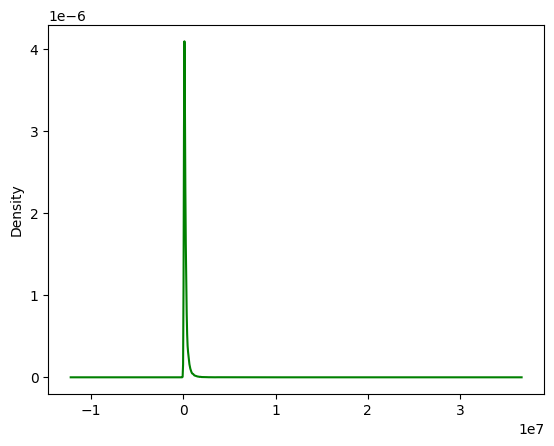

In [ ]:
dataset['Valor comercial'].plot.density(color = 'green')
plt.show()

/tmp/ipykernel_2841/4184793308.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



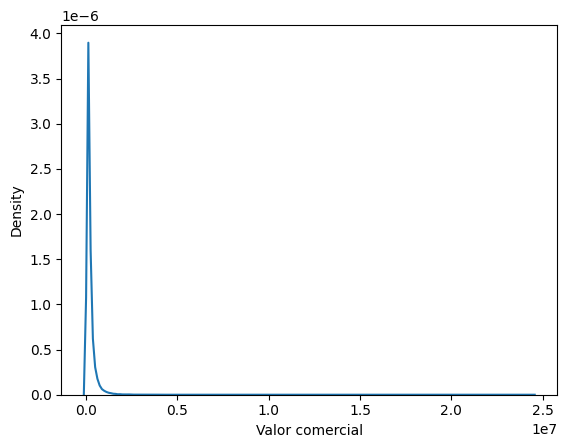

In [ ]:
# Im still standing

sns.distplot(dataset['Valor comercial'], hist=False)
plt.show()

# En esta sección hacemos QQ-Plot 

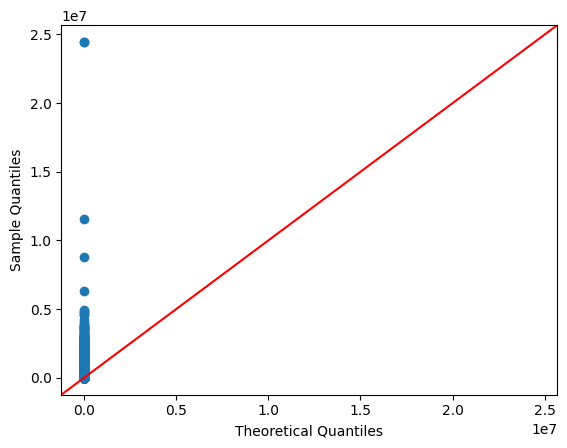

In [ ]:
fig = sm.qqplot(dataset['Valor comercial'], line = '45')
plt.show()

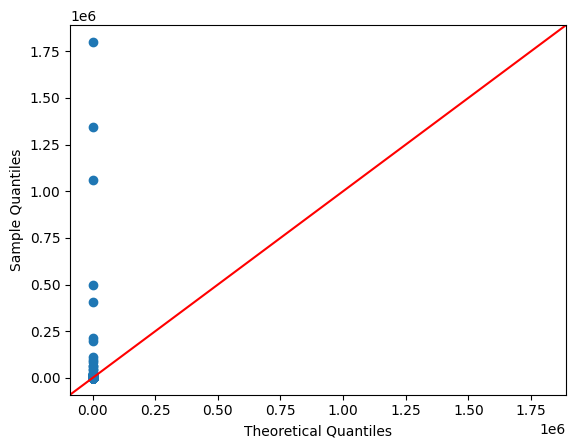

In [ ]:
fig = sm.qqplot(dataset['Área Terreno'], line = '45')
plt.show()

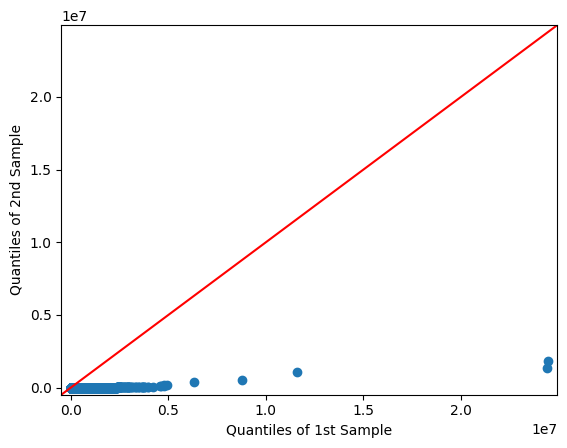

In [ ]:
fig = sm.qqplot_2samples(dataset['Valor comercial'],dataset['Área Terreno'], line = '45')
plt.show()

# División de datos por categoría

In [ ]:

all_headers = ['Fecha entrega del Informe', 
               'Calle', 
               'Piso', 
               'Departamento',
               'Provincia', 
               'Distrito', 
               'Número de estacionamiento',
               'Depósitos',
               'Latitud (Decimal)', 
               'Longitud (Decimal)', 
               'Categoría del bien',
               'Posición', 
               'Número de frentes', 
               'Edad', 
               'Elevador',
               'Estado de conservación', 
               'Método Representado', 
               'Área Terreno',
               'Área Construcción', 
               'Valor comercial (USD)']


In [ ]:
non_numerical = ['Fecha de entrega del Informe',
                 'Calle',
                 'Piso',
                 'Departamento',
                 'Provincia',
                 'Distrito',
                 'Categoría del bien',
                 'Posición',
                 'Estado de conservación',
                 'Método Representado']

numerical = ['Número de estacionamiento',
             'Depósitos',
             'Latitud (Decimal)',
             'Longitud (Decimal)',
             'Número de frentes',
             'Edad',
             'Elevador',
             'Área Terreno',
             'Área Construcción',
             'Valor comercial (USD)']

categorical = ['Departamento',
               'Provincia', 
               'Distrito',  
               'Categoría del bien',
               'Posición',   
               'Método Representado']

continuous = ['Latitud (Decimal)', 
              'Longitud (Decimal)', 
              'Área Terreno',
              'Área Construcción', 
              'Valor comercial (USD)']

discrete = ['Número de estacionamiento',
            'Depósitos',
            'Número de frentes', 
            'Edad', 
            'Elevador']

numerical_non_categorical = ['Número de estacionamiento',
                              'Depósitos',
                              'Latitud (Decimal)',
                              'Longitud (Decimal)',
                              'Número de frentes',
                              'Edad',
                              'Elevador',
                              'Área Terreno',
                              'Área Construcción',
                              'Valor comercial']

geographicals = ['Calle',
                 'Departamento',
                 'Provincia',
                 'Distrito',
                 'Latitud (Decimal)',
                 'Longitud (Decimal)']


In [ ]:
departamentos = ['Amazonas',
                 'Ancash',
                 'Apurimac', 
                 'Arequipa', 
                 'Ayacucho', 
                 'Cajamarca', 
                 'Callao', 
                 'Cusco',
                 'Huancavelica', 
                 'Huanuco', 
                 'Ica', 
                 'Junín', 
                 'La Libertad', 
                 'Lambayeque', 
                 'Lima', 
                 'Loreto', 
                 'Madre de Dios', 
                 'Moquegua', 
                 'Pasco', 
                 'Piura', 
                 'Puno', 
                 'San Martín', 
                 'Tacna', 
                 'Tumbes', 
                 'Ucayali']

In [ ]:
#Idealmente este paso lo tendría que volver a hacer, ya que necesito volver a generar las matrices, 
#de correlaciones de cada uno de los departamentos.

#A <- Heavy age
#B <- Square symetry
#C <- Abnormal

#Grupos por departamento

grupos = {'A' : ['Arequipa', 'Huancavelica', 'Junín', 'Lima', 'Monquegua', 'Piura', 'San Martín'],
          'B' : ['Ayacucho', 'Callao', 'Cusco', 'La Libertad', 'Lambayeque', 'Loreto', 'Pasco', 'Puno', 'Tacna', 'Tumbes', 'Ucayali'],
          'C' : ['Amazonas', 'Madre de Dios']}

In [ ]:
numerical_data = dataset[numerical_non_categorical].copy()

numerical_data['Latitud (Decimal)'] = (numerical_data['Latitud (Decimal)'] - numerical_data['Latitud (Decimal)'].min()) / (numerical_data['Latitud (Decimal)'].max() - numerical_data['Latitud (Decimal)'].min())
numerical_data['Longitud (Decimal)'] = (numerical_data['Longitud (Decimal)'] - numerical_data['Longitud (Decimal)'].min()) / (numerical_data['Longitud (Decimal)'].max() - numerical_data['Longitud (Decimal)'].min())

#numerical_data['Número de estacionamiento'].replace(np.nan, 0.0, inplace=True)


numerical_data = numerical_data.applymap(lambda x : float(x.replace(',','')) if isinstance(x,str) else x)
numerical_data_log = numerical_data.applymap(lambda x : np.log10(x + 0.00001))
numerical_data_log = numerical_data_log.fillna(0)

In [ ]:
numerical_data_log.head()

,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Número de frentes,Edad,Elevador,Área Terreno,Área Construcción,Valor comercial
0,0.000004,-5.0,-0.005229,-1.657866,-5.0,0.602061,-5.0,1.201670,1.814913,4.923006
1,-5.000000,-5.0,-0.005229,-1.659919,-5.0,-5.000000,-5.0,0.909557,1.962748,4.931229
2,-5.000000,-5.0,-0.005227,-1.934008,-5.0,1.079182,-5.0,1.311966,1.950316,4.923441
3,-5.000000,-5.0,-0.005229,-1.657112,-5.0,-5.000000,-5.0,0.873902,1.723456,5.047738
4,0.000004,-5.0,-0.005229,-1.645814,-5.0,1.278754,-5.0,2.380211,2.752816,5.484572


In [ ]:
numerical_data.describe()

,Número de estacionamiento,Depósitos,Latitud (Decimal),Longitud (Decimal),Número de frentes,Edad,Elevador,Área Terreno,Área Construcción,Valor comercial
count,39619.000000,39619.000000,39619.000000,39619.000000,39619.000000,39619.000000,39619.000000,3.961900e+04,39619.000000,3.961900e+04
mean,0.545874,0.166132,0.987998,0.024831,0.043969,14.253262,0.139302,2.775748e+02,160.248347,2.272190e+05
std,17.527499,2.286756,0.004964,0.029991,0.278253,31.825126,0.471784,1.302022e+04,152.710441,3.136169e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00
25%,0.000000,0.000000,0.988022,0.021902,0.000000,1.000000,0.000000,1.075000e+01,78.040000,9.726800e+04
50%,0.000000,0.000000,0.988022,0.022101,0.000000,6.000000,0.000000,2.877000e+01,112.290000,1.531660e+05
75%,1.000000,0.000000,0.988022,0.022359,0.000000,21.000000,0.000000,1.260000e+02,194.750000,2.628320e+05
max,2424.000000,200.000000,1.000000,1.000000,22.000000,2022.000000,11.000000,1.800000e+06,9510.000000,2.444672e+07


In [ ]:
sns.heatmap(numerical_data_log.corr(), cmap='vlag', vmin=-1, vmax=1)
plt.show()

NameError: name 'sns' is not defined

In [ ]:
pca_out = PCA().fit(numerical_data_log)
pca_scores = PCA().fit_transform(numerical_data_log)
loadings = pca_out.components_

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=numerical_data_log.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

cluster.biplot(cscore=pca_scores, loadings=loadings, labels=numerical_data_log.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2), var2=round(pca_out.explained_variance_ratio_[1]*100, 2), 
               var3=round(pca_out.explained_variance_ratio_[2]*100, 2))

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

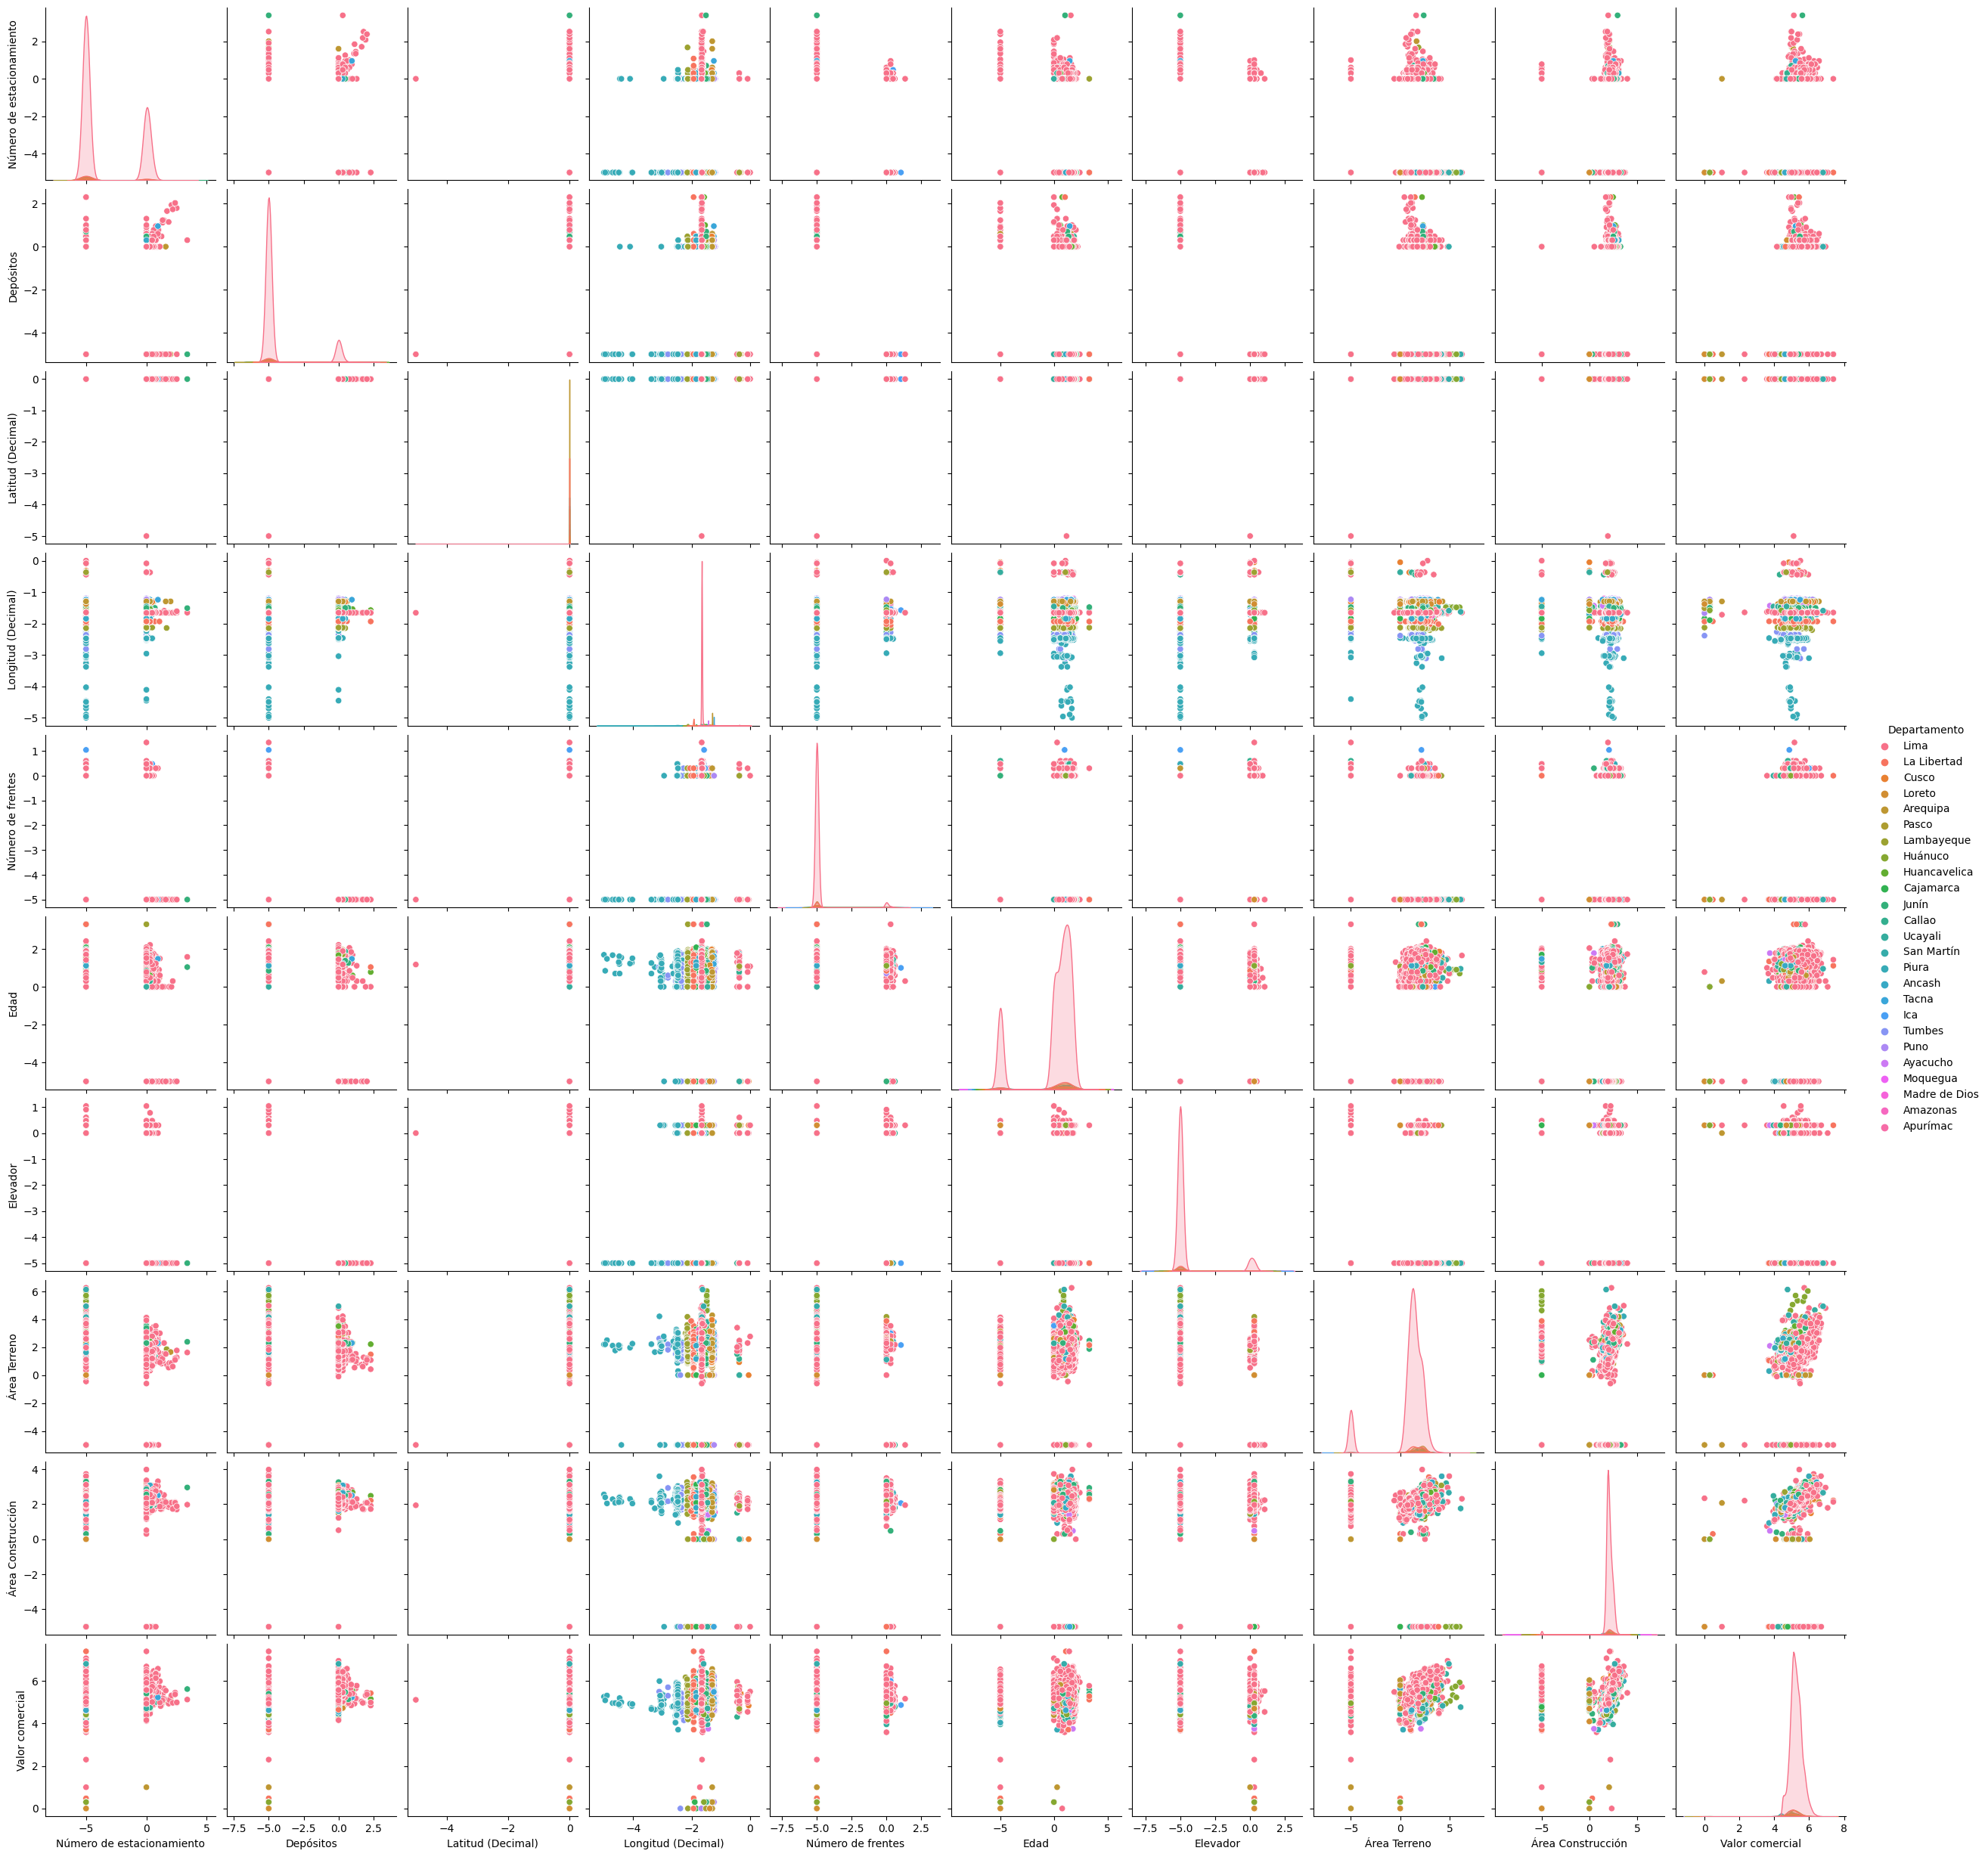

In [ ]:
numerical_data_log.insert(0,'Departamento', dataset['Departamento'].to_numpy())

sns.pairplot(numerical_data_log, hue='Departamento')
plt.show()

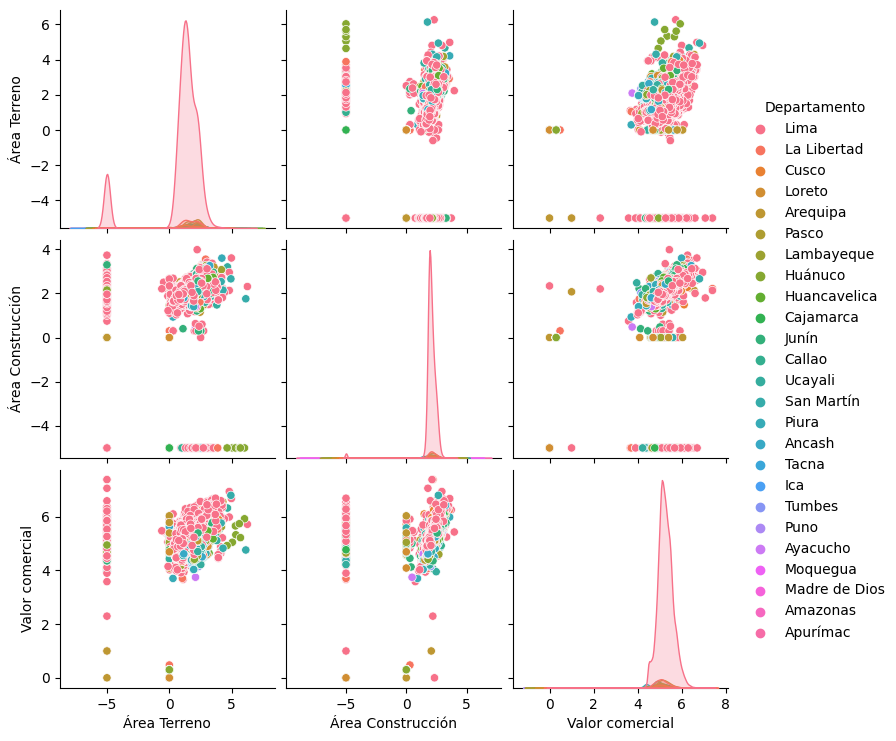

In [ ]:
cols_to_plot = numerical_data_log.columns[8:11].to_list() + ['Departamento']
sns.pairplot(numerical_data_log[cols_to_plot], hue="Departamento")
plt.show()

/tmp/ipykernel_2841/722057007.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


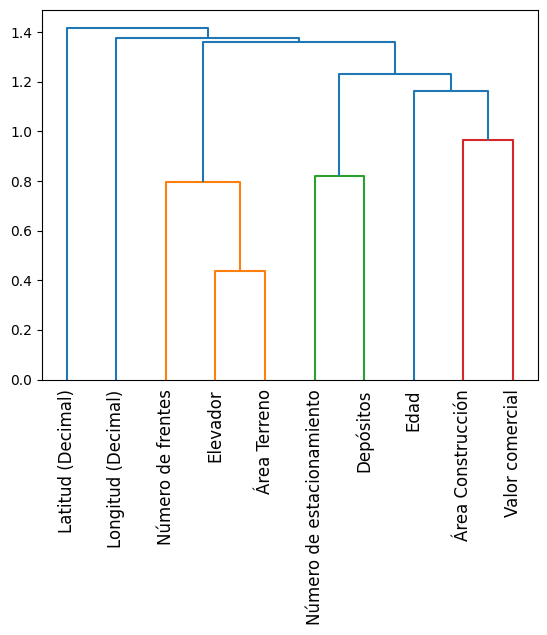

In [ ]:
linkage_data = linkage(numerical_data_log.corr().applymap(lambda x: np.abs(x)), method='single', metric='euclidean')
dendrogram(linkage_data, labels=numerical_data.columns, leaf_rotation=90, count_sort=True)

plt.show()

## Serie de Tiempo de los precios de la base de datos



## Matriz de Correlacion de todos los datos

In [ ]:
dataset.corr()

sns.heatmap(dataset.corr(), vmin=-1, vmax=1, cmap= "vlag")

/tmp/ipykernel_2841/1359459431.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
/tmp/ipykernel_2841/1359459431.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<AxesSubplot: >

## Observaciones

De primera mano, podemos observar que:

Variables mas correlacionadas con respecto al valor commercial son

    - Area de construcción
    - Edad
    - Area del Terreno
    - Numero de Frentes